In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [21]:
files = os.listdir()
csvs = [f for f in files if f.endswith('.csv')]
print(csvs)

['evaluation_results_20250118-164705.csv', 'evaluation_results_20250118-170100.csv', 'evaluation_results_20250118-171508.csv', 'evaluation_results_20250118-173143.csv', 'evaluation_results_20250118-174533.csv']


In [22]:
# Read in the data from the csv files to pandas dataframe
dfs = [pd.read_csv(f) for f in csvs]

df = pd.concat(dfs, ignore_index=True)
df.head()

,question,correct_answer,model_response,is_correct,use_retrieval,use_reranker,context_provided
0,Zgodnie z Konstytucją Rzeczypospolitej Polskie...,Sejm i Senat,A,True,False,False,False
1,Zgodnie z Konstytucją Rzeczypospolitej Polskie...,Prezydent Rzeczypospolitej Polskiej i Rada Min...,A,True,False,False,False
2,Zgodnie z Konstytucją Rzeczypospolitej Polskie...,Narodu,B,True,False,False,False
3,Zgodnie z Konstytucją Rzeczypospolitej Polskie...,Jest jawne,A. Jest jawne,True,False,False,False
4,Zgodnie z Konstytucją Rzeczypospolitej Polskie...,Rzeczypospolitej Polskiej,C. Rzeczypospolitej Polskiej,True,False,False,False


In [23]:
df.groupby(["use_retrieval", "use_reranker"]).agg({"is_correct": ["mean"]})

is_correct
                                 mean
use_retrieval use_reranker           
False         False          0.892683
True          False          0.907317
              True           0.946341

C:\Users\adamm\AppData\Local\Temp\ipykernel_21836\2860984761.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="use_retrieval", y="is_correct", hue="use_reranker", data=df, ci=None)


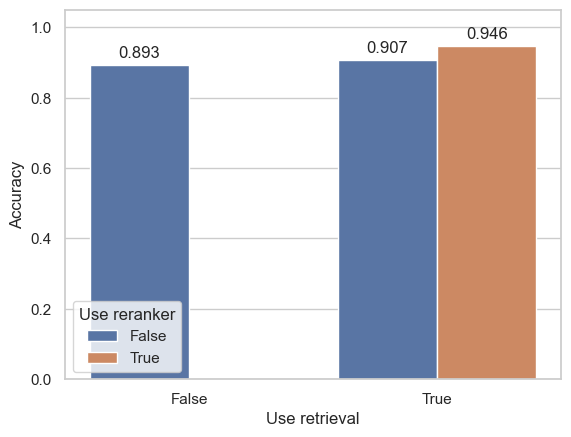

In [26]:
# make a plot corresponding to df.groupby(["use_retrieval", "use_reranker"]).agg({"is_correct": ["mean"]})
sns.set_theme(style="whitegrid")
sns.barplot(x="use_retrieval", y="is_correct", hue="use_reranker", data=df, ci=None)
plt.ylabel("Accuracy")
plt.xlabel("Use retrieval")
# move legend to bottom left
plt.legend(loc='lower left', title="Use reranker")
plt.ylim(0, 1.05)

# Add value labels on top of each bar
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.3f', padding=3)

plt.show()


In [25]:
# get the questions which were most often answered incorrectly
df.groupby(["question", "use_retrieval", "use_reranker"]).agg(
    {"is_correct": ["mean", "count"]}
).sort_values(by=("is_correct", "mean")).head(20)

is_correct  \
                                                                                    mean   
question                                           use_retrieval use_reranker              
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... False         False               0.0   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... False         False               0.0   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... False         False               0.0   
                                                   True          True                0.0   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          True                0.0   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          False               0.0   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... False         False               0.0   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          False               0.2   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          False               0.4   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          False               0.4   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          False               0.6   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... False         False               0.8   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          True                0.8   
                                                                 False               0.8   
                                                   False         False               0.8   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          False               0.8   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          False               1.0   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... False         False               1.0   
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          True                1.0   
                                                                 False               1.0   

                                                                                     
                                                                              count  
question                                           use_retrieval use_reranker        
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... False         False            5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... False         False            5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... False         False            5  
                                                   True          True             5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          True             5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          False            5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... False         False            5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          False            5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          False            5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          False            5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          False            5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... False         False            5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          True             5  
                                                                 False            5  
                                                   False         False            5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          False            5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          False            5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... False         False            5  
Zgodnie z Konstytucją Rzeczypospolitej Polskiej... True          True             5  
                                                                 Fals